## 2. Digit Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gzip

% matplotlib inline

In [31]:
def sigmoid(z):
    return np.array([min(0.99,max(0.01, 1/(1+np.exp(-i)))) for i in z])

def quantise(g):
    return np.array([int(i>=0.5) for i in g])

def sgd_for_log_reg(W, x, y, learning_rate = 0.5, iteration = 50):
    error = []
    xT = np.transpose(x)
    for i in range(1000):
        z = np.matmul(W,xT)
        y_ = sigmoid(z)
        cross_entropy = np.mean(-y*np.log(y_) - (1-y)*np.log(1-y_))
        error.append(cross_entropy)
        dL_dw = np.array([(y[i] - y_[i])*xj[i] for xj in xT])
        W += learning_rate*dL_dw
        
    return W, error

def plot_error(error):
    plt.plot(range(len(error)),error, color="red")
    plt.title("error vs iteration")
    plt.show()

def get_01(x,y):
    a, b = [], []
    for x,y in zip(x,y):
        if y in [0,1]:
            a.append(x)
            b.append(y)
    return np.array(a), np.array(b)

In [3]:
"""
Used with edits from Git. Don't have experience in file I/O
https://gist.github.com/
ischlag/41d15424e7989b936c1609b53edd1390#file-mnist-to-jpg-py-L43
"""

def get_images(filename, no_of_imgs):

    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        to_buffer = bytestream.read(28 * 28 * no_of_imgs)
        vectorised = np.frombuffer(to_buffer, dtype = np.uint8).astype(np.float32).reshape(no_of_imgs, 784)
    return vectorised

def get_labels(filename, no_of_labels):

    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        to_buffer = bytestream.read(1 * no_of_labels)
        labels = np.frombuffer(to_buffer, dtype = np.uint8).astype(np.int64)
    return labels

In [4]:
X_train, X_train_vec = get_images("train-images-idx3-ubyte.gz",60000)
y_train = get_labels("train-labels-idx1-ubyte.gz",60000)

X_test, X_test_vec = get_images("t10k-images-idx3-ubyte.gz",10000)
y_test = get_labels("t10k-labels-idx1-ubyte.gz",10000)

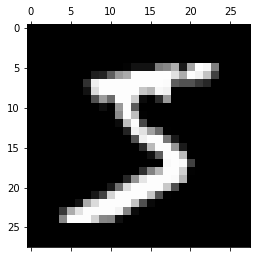

In [5]:
plt.matshow(X_train[0], cmap = plt.cm.gray)
plt.show()

In [21]:
no_train = len(y_train[y_train==0]) + len(y_train[y_train==1])
no_test = len(y_test[y_test==0]) + len(y_test[y_test==1])

print("No. of training examples : "+str(no_train))
print("No. of testing examples : "+str(no_test))

No. of training examples : 12665
No. of testing examples : 2115


In [7]:
X_train, y_train = get_01(X_train_vec, y_train)
X_test, y_test = get_01(X_test_vec, y_test)

label : 0


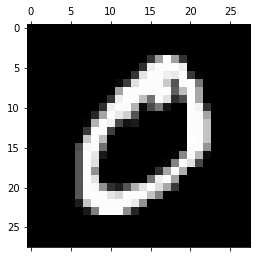

In [8]:
print("label : " + str(y_train[0]))

plt.matshow(X_train[0].reshape(28,28), cmap = plt.cm.gray)
plt.show()

In [9]:
W = np.random.randn(784)

In [11]:
W, error = sgd_for_log_reg(W, X_train, y_train, 1, 1000)

/Users/avinash/anaconda3/envs/datasci/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


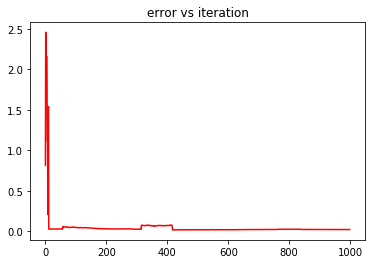

In [12]:
plot_error(error)

In [13]:
f = quantise(y_) == y

In [19]:
train_accuracy = len(f[f==True])/(1.0*len(f))
print("train_sccuracy : " + str(train_accuracy))

train_sccuracy : 0.997315436242


In [15]:
y_2 = sigmoid(np.matmul(W,np.transpose(X_test)))

/Users/avinash/anaconda3/envs/datasci/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [16]:
r = quantise(y_2) == y_test

In [18]:
test_accuracy = len(r[r==True])/(1.0*len(r))
print("test_sccuracy : " + str(test_accuracy))

test_sccuracy : 0.999527186761


In [29]:
# Normalising the data

X_train_n = X_train/255.0
print("min of X : "+str(np.min(X_train_n)))
print("max of X : "+str(np.max(X_train_n)))

min of X : 0.0
max of X : 1.0


In [32]:
W_n = np.random.randn(784)
W_n, error_n = sgd_for_log_reg(W_n, X_train_n, y_train, 1, 1000)

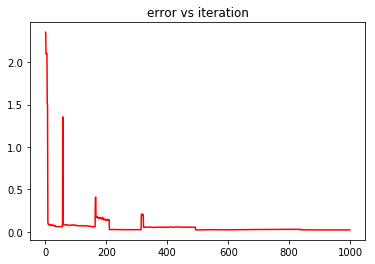

In [33]:
plot_error(error_n)

In [38]:
y_n = sigmoid(np.matmul(W_n,np.transpose(X_train_n)))

f_n = quantise(y_n) == y

In [39]:
train_accuracy_n = len(f_n[f_n==True])/(1.0*len(f_n))
print("Normalised train_sccuracy : " + str(train_accuracy_n))

Normalised train_sccuracy : 0.997236478484


In [42]:
y_2n = sigmoid(np.matmul(W_n,np.transpose(X_test/255.0)))

r_n = quantise(y_2n) == y_test

In [43]:
test_accuracy_n = len(r_n[r_n==True])/(1.0*len(r_n))
print("test_sccuracy : " + str(test_accuracy_n))

test_sccuracy : 0.999527186761


#### Why you are sure your code works. That is, what test cases did you use and why are they general? 

We can see the error has saturated well and both training and testing accuracy tend to 100. Test cases were provided separately and is beleived to be picked random enough to truly represent the dataset.

#### Accuracies and code can been seen above